<a href="https://colab.research.google.com/github/romanzes637/Hoek-Brown/blob/master/Hoek_Brown.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hoek-Brown in principal stresses
https://en.wikipedia.org/wiki/Hoek%E2%80%93Brown_failure_criterion

$\sigma_1=\sigma_3+\sqrt{A\sigma_3+B^2}$

 $\sigma_1$ - major principal stress
 
 $\sigma_3$ - minor principal stress
 
$A= \dfrac{C_0^2-T_0^2}{T_0}$ - material constant

$B = C_0$ - material constant

 $T_0$ - Uniaxial Tensile Strength (UCS)
 
 $C_0$ - Ultimate (Uniaxial) Compressive Strength (UTS)

# Hoek-Brown in mean stresses
https://en.wikipedia.org/wiki/Hoek%E2%80%93Brown_failure_criterion

$\tau_m=\frac{1}{2}(\sigma_1-\sigma_3)$ - mean shear stress

$\sigma_m=\frac{1}{2}(\sigma_1+\sigma_3)$ - mean normal stress

$\sigma_1= \sigma_m + \tau_m$

$\sigma_3= \sigma_m - \tau_m$

$\tau_m=\frac{1}{2}\sqrt{A(\sigma_m-\tau_m)+B^2}$

$\tau_m=\frac{1}{8}(-A\pm\sqrt{A^2+16(A\sigma_m + B^2}))$

# Generalized Hoek-Brown in principal stresses
https://www.rocscience.com/help/rocdata/rocdata/Generalized_Hoek-Brown_Criterion.htm

$\sigma_1=\sigma_3+\sigma_{ci}\left(m_b\dfrac{\sigma_3}{\sigma_{ci}}+s\right)^a$

$\sigma_1$ - major principal stress

$\sigma_3$ - minor principal stress

$\sigma_{ci}$ - Uniaxial Compressive Strength (UCS) of the intact rock material

$m_b$ - reduced value of the material constant $m_i$ (for the intact rock)}

$s$ and $ a$ - constants depend upon the characteristics of the rock mass

$m_b=m_i\exp\left(\dfrac{GSI-100}{28-4D}\right)$

$s=\exp\left(\dfrac{GSI-100}{9-3D}\right)$

$a=\dfrac{1}{2}+\dfrac{1}{6}\left[\exp\left(-\dfrac{GSI}{15}\right)-\exp\left(-\dfrac{20}{3}\right)\right]$

$GSI$ -  (Geological Strength Index) relates the failure criterion to geological observations in the field

$m_i$ - material constant for the intact rock

$D$ - "disturbance factor" which depends upon the degree of disturbance to which the rock mass has been subjected by blast damage and/or stress relaxation. It varies from 0 for undisturbed in situ rock masses to 1 for very disturbed rock masses.

# Generalized Hoek-Brown in mean stresses
$\sigma_m=\frac{1}{2}(\sigma_1+\sigma_3)$ - mean normal stress

$\tau_m=\frac{1}{2}(\sigma_1-\sigma_3)$ - mean shear stress

$\sigma_1=\sigma_3+\sigma_{ci}\left(m_b\dfrac{\sigma_3}{\sigma_{ci}}+s\right)^a$

$\tau_m=\frac{1}{2}\sigma_{ci}\left(m_b\dfrac{(\sigma_m-\tau_m)}{\sigma_{ci}}+s\right)^a$

# Mour-Coulomb

$\tau=c+\sigma\tan{\phi}$

$\sigma$ - normal stress

$\tau$ - shear stress

$c$ - cohesion

$\phi$ - angle of internal friction

from Mohr's cirlce

$\sigma =\sigma_m+\tau_m\sin{\phi}$

$\tau =\tau_m\cos{\phi}$

where

$\tau_m=\frac{1}{2}(\sigma_1-\sigma_3)$ - mean normal stress

$\sigma_m=\frac{1}{2}(\sigma_1+\sigma_3)$ - mean shear stress

eventually

$\tau_m=\sigma_m\sin{\phi}+c\cos{\phi}$



# Sympy implementation

suffix **p** means principal stresses ($\sigma_1$, $\sigma_3$)

suffix **m** means mean stresses ($\sigma_m$, $\tau_m$)

prefix **d** means derivative

prefix **dd** means second derivative

suffix **np** means numpy

**mc** - Mohr-Coulomb

**hb** - Hoek-Brown

**ghb** - Generalized Hoek-Brown

**dist** - distance

In [0]:
import sympy as sym
import numpy as np
import copy

# Mohr-Coulomb
def mc_m():
  c = sym.Symbol('c')
  phi = sym.Symbol('phi')
  sigma_m = sym.Symbol('sigma_m')
  return sigma_m*sym.sin(phi) + c*sym.cos(phi)
def mc_m_np(sigma_m, c, phi):
  f = sym.lambdify((sym.Symbol('sigma_m'), sym.Symbol('c'),
                    sym.Symbol('phi')), mc_m(), 'numpy')
  return f(sigma_m, c, phi)
def mc_m_dist():
  sigma_p = sym.Symbol('sigma_p')
  tau_p = sym.Symbol('tau_p')
  c = sym.Symbol('c')
  phi = sym.Symbol('phi')
  sigma_m = sym.Symbol('sigma_m')
  return ((sigma_p - sigma_m)**2 + (tau_p - mc_m())**2)**0.5
def mc_m_dist_np(sigma_p, tau_p, sigma_m, c, phi):
  f = sym.lambdify((sym.Symbol('sigma_p'), sym.Symbol('tau_p'),
                   sym.Symbol('sigma_m'), sym.Symbol('c'), sym.Symbol('phi')), 
                   mc_m_dist(), 'numpy')
  return f(sigma_p, tau_p, sigma_m, c, phi)
def d_mc_m_dist():
  return sym.diff(mc_m_dist(), sym.Symbol('sigma_m'), 1)
def d_mc_m_dist_np(sigma_p, tau_p, sigma_m, c, phi):
  f = sym.lambdify((sym.Symbol('sigma_p'), sym.Symbol('tau_p'),
                   sym.Symbol('sigma_m'), sym.Symbol('c'), sym.Symbol('phi')), 
                   d_mc_m_dist(), 'numpy')
  return f(sigma_p, tau_p, sigma_m, c, phi)
def mc_m_min_dist():
  return sym.solveset(d_mc_m_dist(), sym.Symbol('sigma_m'))
def mc_m_min_dist_np(sigma_p, tau_p, c, phi):
  f = sym.lambdify((sym.Symbol('sigma_p'), sym.Symbol('tau_p'),
                   sym.Symbol('c'),
                   sym.Symbol('phi')), list(mc_m_min_dist())[0], 'numpy')
  return f(sigma_p, tau_p, c, phi)

# Hoek-Brown
def hb_m():
  a = sym.Symbol('A')
  b = sym.Symbol('B')
  sigma_m = sym.Symbol('sigma_m')
  tau_m = sym.Symbol('tau_m')
  e = 0.5*(a*(sigma_m-tau_m) + b**2)**0.5 - tau_m
  return sym.solve(e, tau_m)
def hb_m_np():
  fs = [sym.lambdify((sym.Symbol('sigma_m'), sym.Symbol('A'),  sym.Symbol('B')),
        x, 'numpy') for x in hb_m()]
  return fs
def hb_m_dist():
  a = sym.Symbol('A')
  b = sym.Symbol('B')
  sigma_m = sym.Symbol('sigma_m')
  sigma_p = sym.Symbol('sigma_p')
  tau_p = sym.Symbol('tau_p')
  return [((sigma_p - sigma_m)**2 + (tau_p - x)**2)**0.5 for x in hb_m()]
def hb_m_dist_np():
  fs = [sym.lambdify((sym.Symbol('sigma_p'), sym.Symbol('tau_p'),
                   sym.Symbol('sigma_m'), sym.Symbol('A'),  sym.Symbol('B')),
                   x, 'numpy') for x in hb_m_dist()]
  return fs
def hb_m_min_dist_np(sigma_p, tau_p, a, b, tol=1e-2, maxit=100, 
                     dist=False):
  # Newton's (Newton–Raphson) method
  # x - min_sigma_m, y - min_tau_m
  f = d_hb_m_dist_np()[1]  # distance derivative
  dfdx = dd_hb_m_dist_np()[1]  # distance second derivative
  x = copy.deepcopy(sigma_p)  # initial guess
  for _ in range(maxit):
    y = f(sigma_p, tau_p, x, a, b)
    if np.all(abs(y) < tol):
      break
    dydx = dfdx(sigma_p, tau_p, x, a, b)
    x -= y/dydx
  if dist:
    d = hb_m_dist_np()[1](sigma_p, tau_p, x, a, b)
    return d
  else:
    return x
def d_hb_m():
  return [sym.diff(x, sym.Symbol('sigma_m'), 1) for x in hb_m()]
def d_hb_m_dist():
  return [sym.diff(x, sym.Symbol('sigma_m'), 1) for x in hb_m_dist()]
def dd_hb_m_dist():
  return [sym.diff(x, sym.Symbol('sigma_m'), 2) for x in hb_m_dist()]
def d_hb_m_np():
  return [sym.lambdify((sym.Symbol('sigma_m'), sym.Symbol('A'),
                        sym.Symbol('B')), x, 'numpy') for x in d_hb_m()]
def d_hb_m_dist_np():
  return [sym.lambdify((sym.Symbol('sigma_p'), sym.Symbol('tau_p'), 
       sym.Symbol('sigma_m'), sym.Symbol('A'),  sym.Symbol('B')),
      x, 'numpy') for x in d_hb_m_dist()]
def dd_hb_m_dist_np():
    return [sym.lambdify((sym.Symbol('sigma_p'), sym.Symbol('tau_p'), 
       sym.Symbol('sigma_m'), sym.Symbol('A'),  sym.Symbol('B')),
      x, 'numpy') for x in dd_hb_m_dist()]

# Generalized Hoek-Brown
def ghb_p():
  m_b = sym.Symbol('m_b')
  sigma_ci = sym.Symbol('sigma_ci')
  a = sym.Symbol('a')
  s = sym.Symbol('s')
  sigma_3 = sym.Symbol('sigma_3')
  return sigma_3 + sigma_ci*(m_b*sigma_3/sigma_ci + s)**a
def ghb_p_np(sigma_3, m_b, sigma_ci, a, s):
  f = sym.lambdify((sym.Symbol('sigma_3'), 
      sym.Symbol('m_b'), sym.Symbol('sigma_ci'),  sym.Symbol('a'),
      sym.Symbol('s')), ghb_p(), 'numpy')
  return f(sigma_3, m_b, sigma_ci, a, s)
def d_ghb_p(n=1):
  return sym.diff(ghb_p(), sym.Symbol('sigma_3'), n)
def ghb_m():
  sigma_m = sym.Symbol('sigma_m')
  tau_m = sym.Symbol('tau_m')
  m_b = sym.Symbol('m_b')
  sigma_ci = sym.Symbol('sigma_ci')
  a = sym.Symbol('a')
  s = sym.Symbol('s')
  e = 0.5*sigma_ci*(m_b*(sigma_m-tau_m)/sigma_ci + s)**a - tau_m
  return sym.solveset(e, tau_m)
def d_ghb_m(n=1):
  return sym.diff(ghb_m(), sym.Symbol('tau_m'), n)
def ghb_m_np(sigma_m, m_b, sigma_ci, a, s, tol=.01, maxit=100):
  s_sigma_m = sym.Symbol('sigma_m')
  s_tau_m = sym.Symbol('tau_m')
  s_m_b = sym.Symbol('m_b')
  s_sigma_ci = sym.Symbol('sigma_ci')
  s_a = sym.Symbol('a')
  s_s = sym.Symbol('s')
  e = 0.5*s_sigma_ci*(s_m_b*(s_sigma_m-s_tau_m)/s_sigma_ci + s_s)**s_a - s_tau_m
  de = sym.diff(e, s_tau_m, 1)
  e_np = sym.lambdify((s_sigma_m, s_tau_m, s_m_b, s_sigma_ci, s_a, s_s), e, 'numpy')
  de_np = sym.lambdify((s_sigma_m, s_tau_m, s_m_b, s_sigma_ci, s_a, s_s), de, 'numpy')
  # minimizing e by tau_m (Newton-Raphson)
  tau_m = copy.deepcopy(sigma_m)  # initial guess (copy as sigma_m may be an array)
  for _ in range(maxit):
    y = e_np(sigma_m, tau_m, m_b, sigma_ci, a, s)
    if np.all(abs(y) < tol):
      break
    dydx = de_np(sigma_m, tau_m, m_b, sigma_ci, a, s)
    tau_m -= y/dydx
  return tau_m
def ghb_m_dist_np(sigma_p, tau_p, sigma_m, m_b, sigma_ci, a, s,
                  tol=1e-2, maxit=100):
  tau_m = ghb_m_np(sigma_m, m_b, sigma_ci, a, s, tol, maxit)
  return m_dist_np(sigma_p, tau_p, sigma_m, tau_m)
def d_ghb_m_dist_np(sigma_p, tau_p, sigma_m, m_b, sigma_ci, a, s,
                    tol=1e-2, maxit=100, dx=1e-3):
  y = ghb_m_dist_np(sigma_p, tau_p, sigma_m, m_b, sigma_ci, a, s, 
                    tol, maxit)
  sigma_m2 = sigma_m + dx
  y2 = ghb_m_dist_np(sigma_p, tau_p, sigma_m2, m_b, sigma_ci, a, s, 
                    tol, maxit)
  return (y2 - y)/dx
def dd_ghb_m_dist_np(sigma_p, tau_p, sigma_m, m_b, sigma_ci, a, s,
                     tol=1e-2, maxit=100, dx=1e-3):
  y = d_ghb_m_dist_np(sigma_p, tau_p, sigma_m, m_b, sigma_ci, a, s,
                      tol, maxit, dx)
  sigma_m2 = sigma_m + dx
  y2 = d_ghb_m_dist_np(sigma_p, tau_p, sigma_m2, m_b, sigma_ci, a, s,
                      tol, maxit, dx)
  return (y2 - y)/dx
def ghb_m_min_dist_np(sigma_p, tau_p, m_b, sigma_ci, a, s, 
                      tol=1e-2, maxit=100, dist=False,
                      ghb_tol=1e-2, ghb_maxit=100, d_ghb_dx=1e-3):
  # Newton's (Newton–Raphson) method
  x = copy.deepcopy(sigma_p)  # initial guess
  for _ in range(maxit):
    y = d_ghb_m_dist_np(sigma_p, tau_p, x, m_b, sigma_ci, a, s,
                        ghb_tol, ghb_maxit, d_ghb_dx)
    if np.all(abs(y) < tol):
      break
    dydx = dd_ghb_m_dist_np(sigma_p, tau_p, x, m_b, sigma_ci, a, s,
                            ghb_tol, ghb_maxit, d_ghb_dx)
    x -= y/dydx
    print(x, y)
  if dist:
    d = ghb_m_dist_np(sigma_p, tau_p, x, m_b, sigma_ci, a, s, 
                      ghb_tol, ghb_maxit)
    return d
  else:
    return x

# Distances
def m_dist():
  sigma_m = sym.Symbol('sigma_m')
  tau_m = sym.Symbol('tau_m')
  sigma_p = sym.Symbol('sigma_p')
  tau_p = sym.Symbol('tau_p')
  return ((sigma_p - sigma_m)**2 + (tau_p - tau_m)**2)**0.5
def m_dist_np(sigma_p, tau_p, sigma_m, tau_m):
  f = sym.lambdify((sym.Symbol('sigma_p'), sym.Symbol('tau_p'), 
                       sym.Symbol('sigma_m'),  sym.Symbol('tau_m')), 
                       m_dist(), 'numpy')
  return f(sigma_p, tau_p, sigma_m, tau_m)

# Coordinates
def p_to_m(sigma_1, sigma_3):
  sigma_m = 0.5*(sigma_1 + sigma_3)
  tau_m = 0.5*(sigma_1 - sigma_3)
  return sigma_m, tau_m

def m_to_p(sigma_m, tau_m):
  sigma_1 = sigma_m + tau_m
  sigma_3 = sigma_m - tau_m
  return sigma_1, sigma_3

def jacobian_matrix_m_to_p():
  sigma_m = sym.Symbol('sigma_m')
  tau_m = sym.Symbol('tau_m')
  f = sym.Matrix([sigma_m + tau_m, sigma_m - tau_m])
  cs = sym.Matrix([sigma_m, tau_m])
  j = f.jacobian(cs)
  return j

def metric_tensor_m():
  return jacobian_matrix_m_to_p().transpose()*jacobian_matrix_m_to_p()

def metric_tensor_m_np(sigma_m, tau_m):
  f = sym.lambdify((sym.Symbol('sigma_m'), sym.Symbol('tau_m')), 
                       metric_tensor_m(), 'numpy')
  return f(sigma_m, tau_m)

def jacobian_matrix_p_to_m():
  sigma_1 = sym.Symbol('sigma_1')
  sigma_3 = sym.Symbol('sigma_3')
  f = sym.Matrix([0.5*(sigma_1 + sigma_3), 0.5*(sigma_1 - sigma_3)])
  cs = sym.Matrix([sigma_1, sigma_3])
  j = f.jacobian(cs)
  return j

def metric_tensor_p():
  return jacobian_matrix_p_to_m().transpose()*jacobian_matrix_p_to_m()

def metric_tensor_p_np(sigma_1, sigma_3):
  f = sym.lambdify((sym.Symbol('sigma_1'), sym.Symbol('sigma_3')), 
                       metric_tensor_p(), 'numpy')
  return f(sigma_1, sigma_3)

In [3]:
sym.init_printing()  # clean LaTeX string e.g. for Word
ghb_p()

In [4]:
sym.init_printing(use_latex='matplotlib', use_unicode=True)  # rendered LaTeX
metric_tensor_p_np(4, 4)

array([[0.5, 0. ],
       [0. , 0.5]])

In [44]:
# evaluate equation
# hb_a = 10
# b = 20
# r = hb_m()[0].evalf(subs={
#     sym.Symbol('A'):hb_a, sym.Symbol('B'):b, sym.Symbol('sigma_m'):sigma_m})
# print(r)
# r = hb_m()[1].evalf(subs={
#     sym.Symbol('A'):hb_a, sym.Symbol('B'):b, sym.Symbol('sigma_m'):sigma_m}) 
# print(r)
# min_sigma_m = hb_m_min_dist_np(120, 100, hb_a, b)
# print(min_sigma_m)
# min_sigma_m = mc_m_min_dist_np(120, 100, 1, 1)
# print(min_sigma_m)
sigma_m = -40
sigma_ci = 100
m_b = 1.
a = .3
s = .8
# print(ghb_m_np(sigma_m, m_b, sigma_ci, a, s))
sigma_p = -40
tau_p = 10
print(ghb_m_min_dist_np(sigma_p, tau_p, m_b, sigma_ci, a, s, 
                        tol=1e-2, maxit=100,
                        ghb_tol=1e-2, ghb_maxit=100, d_ghb_dx=1e-3))
print(ghb_m_min_dist_np(sigma_p, tau_p, m_b, sigma_ci, a, s, 
                        tol=1e-6, maxit=1000,
                        ghb_tol=1e-6, ghb_maxit=1000, d_ghb_dx=1e-6))
# s1, s3 = 30, 10
# sm, tm = p_to_m(s1, s3)
# print(sm, tm)
# print(m_to_p(sm, tm))
# dp = np.array([1, 1])
# dm = np.array([1, 1])
# print(dm.dot(dm)**0.5)
# print(metric_tensor_m_np(sm, tm).dot(dm).dot(dm)**0.5)
# print(dp.dot(dp)**0.5)
# print(metric_tensor_p_np(s1, s3).dot(dp).dot(dp)**0.5)
# xs = np.linspace(-2, 2, 5)
# xx, yy = np.meshgrid(xs, xs)
# xx[xx < 0] = np.nan
# print(xx)
# print(yy)
# def test(x, y):
#   z = x**2 + y**2
#   return z
# test(xx, yy)

-47.607842487572015 0.3857619862657202
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan
-48.35195392307692 0.3857373123139496
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan

KeyboardInterrupt: ignored

# Visual representation

In [0]:
import warnings
warnings.filterwarnings('ignore')

from ipywidgets import interact, interactive, interact_manual
%matplotlib inline
from matplotlib import cm
from matplotlib import colors
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import axes3d

def plot_hb(min_x=-60, max_x=60, min_y=0, max_y=60, n=121, 
            c=0.5, phi=0.1,
            hb_a=100, hb_b=10,
            use_stregth=True, c0=100, t0=10, 
            sigma_ci=100, m_b=1., a=.3, s=.8, 
            use_gsi=True, m_i=1., gsi=1., d=1.,
            sigma_p=0, tau_p=0, 
            width=8, height=8):
  # MC
  # HB material parameters
  if use_stregth:
    hb_a = (c0 * c0 - t0 * t0) / t0
    hb_b = c0
#     m = c0/t0
#     mc_a = (m - 1)/(m + 1)
#     phi = np.arcsin(mc_a)
#     mc_b = 1/(m + 1)
# #     print(0.5*(1-np.sin(phi))/np.cos(phi))
#     c = mc_b/np.cos(phi)
#     print(m, phi)
#   else:
#     mc_a = np.sin(phi)
#     mc_b = c*np.cos(phi)
#     m = mc_a/mc_b + 1
#     print(mc_a/mc_b + 1, phi)
#     mc_c0 = m/(m + 1)
#     mc_t0 = 0.5*mc_c0*(1-np.sin(phi))
#     print(mc_c0, mc_t0)
  # GHB material parameters
  if use_gsi:
    m_b = m_i*np.e**((gsi - 100)/(28 - 4*d))
    s = np.e**((gsi - 100)/(9 - 3*d))
    a = 0.5 + 1/6*(np.e**-(gsi/15) - np.e**-(20/3))
  # Curves
  xs = np.linspace(min_x, max_x, n)
  # MC
  mc_ys = mc_m_np(xs, c, phi)
  # HB
  ys = hb_m_np()[1](xs, hb_a, hb_b)
  dist_ys = hb_m_dist_np()[1](sigma_p, tau_p, xs, hb_a, hb_b)
  ddist_ys = d_hb_m_dist_np()[1](sigma_p, tau_p, xs, hb_a, hb_b)
  # GHB
  ghb_ys = ghb_m_np(xs, m_b, sigma_ci, a, s)
  ghb_dist_ys = ghb_m_dist_np(sigma_p, tau_p, xs, m_b, sigma_ci, a, s)
  d_ghb_dist_ys = d_ghb_m_dist_np(sigma_p, tau_p, xs, m_b, sigma_ci, a, s)
  # Points
  min_sigma_m = hb_m_min_dist_np(sigma_p, tau_p, hb_a, hb_b)
  min_tau_m = hb_m_np()[1](min_sigma_m, hb_a, hb_b)
  ghb_min_sigma_m = ghb_m_min_dist_np(sigma_p, tau_p, m_b, sigma_ci, a, s)
  ghb_min_tau_m = ghb_m_np(ghb_min_sigma_m, m_b, sigma_ci, a, s)
  # Plot
  plt.figure(figsize=(width, height))
#   plt.gca().set_aspect('equal', adjustable='box')
  plt.plot(xs, mc_ys, label='Mohr-Coulomb c={}, phi={}'.format(c, phi),
           color='magenta', linewidth=3)
  plt.plot(xs, ys, label='Hoek-Brown', color='red', linewidth=3)
  plt.plot(xs, ghb_ys, label='Generalized Hoek-Brown', color='purple', 
           linewidth=3)
  plt.plot(xs, dist_ys, label='Hoek-Brown distance', color='green', 
           linewidth=3)
  plt.plot(xs, ghb_dist_ys, label='Generalized Hoek-Brown distance',
             color='yellow', linewidth=3)
  plt.plot(xs, ddist_ys, label='Hoek-Brown distance derivative', 
           color='b', linewidth=3)
  plt.plot(xs, d_ghb_dist_ys, 
           label='Generalized Hoek-Brown distance derivative',
           color='orange', linewidth=3)
  plt.plot([min_x, max_x], [0, 0], color='black', linewidth=1)
  plt.plot([0, 0], [min_x, max_x], color='black', linewidth=1)
  plt.scatter(sigma_p, tau_p, c='black', s=10**2, marker='o')
  plt.scatter(min_sigma_m, min_tau_m, c='r', s=10**2, marker='o')
  plt.scatter(ghb_min_sigma_m, ghb_min_tau_m, c='purple', s=10**2, marker='o')
  plt.xlim(min_x, max_x)
  plt.ylim(min_y, max_y)
  plt.grid()
  plt.legend()
  plt.xlabel('σm, MPa')
  plt.ylabel('τm, MPa')
  plt.show()
  
interact(plot_hb,
          min_x=(-1000, 1000, 1), 
          max_x=(-1000, 1000, 1),
          n=(0, 1000, 1),
          min_y=(-1000, 1000, 1), 
          max_y=(-1000, 1000, 1),
          sigma_p=(-100, 1000, 1),
          tau_p=(-100, 1000, 1),
          c=(0, 100, .05),
          phi=(0, 3, .05),
          c0=(0, 1000, 1.),
          t0=(0, 1000, 1.),
          width=(0, 20, 1),
          height=(0, 20, 1)
        );

# Lines

In [0]:
# Lines
def mc_line_criterion(fig, ax, xx, yy, **kwargs):
  color = kwargs['color']
  c = kwargs['c']
  phi = kwargs['phi']
  f = mc_m_np
  ax.plot(xx[0,], f(xx[0,], c, phi), color=color, 
          label='Mohr-Coulomb, c={}, phi={}'.format(c, phi))
  
def hb_line_criterion(fig, ax, xx, yy, **kwargs):
  color = kwargs['color']
  c0 = kwargs['c0']
  t0 = kwargs['t0']
  a = (c0 * c0 - t0 * t0) / t0
  b = c0
  ax.plot(xx[0,], hb_m_np()[1](xx[0,], a, b), color=color,
          label='Hoek-Brown, m_b={}, B={}, c0={}, t0={}'.format(
              a, b, c0, t0))
  
def ghb_line_criterion(fig, ax, xx, yy, **kwargs):
  color = kwargs['color']
  m_b = kwargs['m_b']
  sigma_ci = kwargs['sigma_ci']
  a = kwargs['a']
  s = kwargs['s']
  tol = kwargs['tol']
  maxit = kwargs['maxit']
  ax.plot(xx[0,], ghb_m_np(xx[0,], m_b, sigma_ci, a, s, tol, maxit), 
          color=color, 
          label='Generalized Hoek-Brown, m_b={}, sigma_ci={}, a={}, s={}'.format(
              m_b, sigma_ci, a, s))
  
def all_line_criterion(fig, ax, xx, yy, **kwargs):
  cmap = kwargs['cmap']
  t = kwargs['t']
  c = cm.get_cmap(cmap)
  for i, (k, v) in enumerate(line_factory.items()):
    if k[1] == t and k[0] != 'all':
      kwargs['color'] = c(i)
      v(fig, ax, xx, yy, **kwargs)
      
line_factory = {
    ('mohr-coulomb', 'criterion'): mc_line_criterion,
    ('hoek-brown', 'criterion'): hb_line_criterion,
    ('generalized hoek-brown', 'criterion'): ghb_line_criterion,
    ('all', 'criterion'): all_line_criterion
}

def draw_line(fig, ax, xx, yy, **kwargs):
  fc = kwargs['fc']
  t = kwargs['t']
  min_x = kwargs['min_x']
  max_x = kwargs['max_x']
  min_y = kwargs['min_y']
  max_y = kwargs['max_y']
  line_factory[(fc, t)](fig, ax, xx, yy, **kwargs) 
  ax.set_xlim(min_x, max_x)
  ax.set_ylim(min_y, max_y)
  ax.legend()
  ax.grid()

# Images

In [0]:
def mc_image_distance(fig, ax, xx, yy, **kwargs):
  cmap = kwargs['cmap']
  min_x = kwargs['min_x']
  max_x = kwargs['max_x']
  min_y = kwargs['min_y']
  max_y = kwargs['max_y']
  c = kwargs['c']
  phi = kwargs['phi']
  zz = mc_m_dist_np(xx, yy, mc_m_min_dist_np(xx, yy, c, phi), c, phi)
  im = ax.imshow(zz, cmap=cmap, origin='lower',
                 extent=[min_x, max_x, min_y, max_y])
  fig.colorbar(im, ax=ax, orientation='horizontal') 
  ax.set_xlabel('σm, MPa')
  ax.set_ylabel('τm, MPa')
  
def hb_image_distance(fig, ax, xx, yy, **kwargs):
  cmap = kwargs['cmap']
  min_x = kwargs['min_x']
  max_x = kwargs['max_x']
  min_y = kwargs['min_y']
  max_y = kwargs['max_y']
  c0 = kwargs['c0']
  t0 = kwargs['t0']
  tol = kwargs['tol'] 
  maxit = kwargs['maxit']
  a = (c0 * c0 - t0 * t0) / t0
  b = c0
  zz = hb_m_min_dist_np(xx, yy, a, b, tol, maxit, dist=True)
  im = ax.imshow(zz, cmap=cmap, origin='lower',
                 extent=[min_x, max_x, min_y, max_y])
  fig.colorbar(im, ax=ax, orientation='horizontal') 
  ax.set_xlabel('σm, MPa')
  ax.set_ylabel('τm, MPa')
#   zs = list()
#   zs2 = list()
#   f, f2 = hb_m_dist_np()
#   for x in xx[0,]:
#     zs.append(f(xx, yy, x, a, b))
#     zs2.append(f2(xx, yy, x, a, b))
#   Z = np.nanmin(np.array(zs), axis=0)
#   Z2 = np.nanmin(np.array(zs2) , axis=0)
#   zz = np.nanmin(np.array([Z, Z2]), axis=0)
#   zz = hb_m_dist_np()[1](xx, yy, hb_m_min_dist_np(xx, yy, a, b), a, b)
  
  
def ghb_image_distance(fig, ax, xx, yy, **kwargs):
  cmap = kwargs['cmap']
  min_x = kwargs['min_x']
  max_x = kwargs['max_x']
  min_y = kwargs['min_y']
  max_y = kwargs['max_y']
  m_b = kwargs['m_b']
  sigma_ci = kwargs['sigma_ci']
  a = kwargs['a']
  s = kwargs['s']
  zz = ghb_m_min_dist_np(xx, yy, m_b, sigma_ci, a, s, dist=True)
  im = ax.imshow(zz, cmap=cmap, origin='lower',
                 extent=[min_x, max_x, min_y, max_y])
  fig.colorbar(im, ax=ax, orientation='horizontal') 
  ax.set_xlabel('σm, MPa')
  ax.set_ylabel('τm, MPa')  
  
image_factory = {
    ('mohr-coulomb', 'distance'): mc_image_distance,
    ('hoek-brown', 'distance'): hb_image_distance,
    ('generalized hoek-brown', 'distance'): ghb_image_distance
}
  
def draw_image(fig, ax, xx, yy, **kwargs):
  fc = kwargs.get('fc', 'all')
  t = kwargs.get('t', 'distance')
  image_factory[(fc, t)](fig, ax, xx, yy, **kwargs)
  # Draw criterion line
  kwargs['t'] = 'criterion'
  pt = 'line'
  draw[pt](fig, ax, xx, yy, **kwargs)

# Surfaces

In [0]:
def mc_surface_distance(fig, ax, xx, yy, **kwargs):
  cmap = kwargs['cmap']
  min_x = kwargs['min_x']
  max_x = kwargs['max_x']
  min_y = kwargs['min_y']
  max_y = kwargs['max_y']
  c = kwargs['c']
  phi = kwargs['phi']
  zz = mc_m_min_dist_np(xx, yy, c, phi)
  sf = ax.plot_surface(xx, yy, zz, cmap=cmap, alpha=0.9, 
                       antialiased=False, rcount=500, ccount=500)
  fig.colorbar(sf, ax=ax, orientation='horizontal') 
  ax.set_zlabel('distance, MPa')
  ax.set_xlabel('σm, MPa')
  ax.set_ylabel('τm, MPa')
  
def mc_surface_distance_0(fig, ax, xx, yy, **kwargs):
  cmap = kwargs['cmap']
  min_x = kwargs['min_x']
  max_x = kwargs['max_x']
  min_y = kwargs['min_y']
  max_y = kwargs['max_y']
  c = kwargs['c']
  phi = kwargs['phi']
  zz = mc_m_min_dist_np(xx, yy, c, phi)
  # replace all distances out the curve by 0
  zz2 = hb_m_mc()[1](xx[0,], a, b)  # FIXME second curve
  for i, z in enumerate(zz2):
    for j, y in enumerate(yy):
      if y[i] > z or np.isnan(z):
        zz[j][i] = 0
  sf = ax.plot_surface(xx, yy, zz, cmap=cmap, alpha=0.9, 
                       antialiased=False, rcount=500, ccount=500)
  fig.colorbar(sf, ax=ax, orientation='horizontal') 
  ax.set_zlabel('distance, MPa')
  ax.set_xlabel('σm, MPa')
  ax.set_ylabel('τm, MPa')

def hb_surface_distance(fig, ax, xx, yy, **kwargs):
  cmap = kwargs['cmap']
  min_x = kwargs['min_x']
  max_x = kwargs['max_x']
  min_y = kwargs['min_y']
  max_y = kwargs['max_y']
  c0 = kwargs['c0']
  t0 = kwargs['t0']
  tol = kwargs['tol'] 
  maxit = kwargs['maxit']
  a = (c0 * c0 - t0 * t0) / t0
  b = c0
  zz = hb_m_min_dist_np(xx, yy, a, b, tol, maxit, dist=True)
  zz[np.isnan(zz)] = 0  # replace nans with zero
  sf = ax.plot_surface(xx, yy, zz, cmap=cmap, alpha=0.9, 
                       antialiased=False, rcount=500, ccount=500)
  fig.colorbar(sf, ax=ax, orientation='horizontal') 
  ax.set_zlabel('distance, MPa')
  ax.set_xlabel('σm, MPa')
  ax.set_ylabel('τm, MPa')
  
def hb_surface_distance_0(fig, ax, xx, yy, **kwargs):
  cmap = kwargs['cmap']
  min_x = kwargs['min_x']
  max_x = kwargs['max_x']
  min_y = kwargs['min_y']
  max_y = kwargs['max_y']
  c0 = kwargs['c0']
  t0 = kwargs['t0']
  tol = kwargs['tol'] 
  maxit = kwargs['maxit']
  a = (c0 * c0 - t0 * t0) / t0
  b = c0
  zz = hb_m_min_dist_np(xx, yy, a, b, tol, maxit, dist=True)
  zz[np.isnan(zz)] = 0  # replace nans with zero
  # replace all distances out the curve by 0
  zz2 = hb_m_np()[1](xx[0,], a, b)  # FIXME second curve
  for i, z in enumerate(zz2):
    for j, y in enumerate(yy):
      if y[i] > z or np.isnan(z):
        zz[j][i] = 0
  sf = ax.plot_surface(xx, yy, zz, cmap=cmap, alpha=0.9, 
                       antialiased=False, rcount=500, ccount=500)
  fig.colorbar(sf, ax=ax, orientation='horizontal') 
  ax.set_zlabel('distance, MPa')
  ax.set_xlabel('σm, MPa')
  ax.set_ylabel('τm, MPa')
  
def ghb_surface_distance(fig, ax, xx, yy, **kwargs):
  cmap = kwargs['cmap']
  min_x = kwargs['min_x']
  max_x = kwargs['max_x']
  min_y = kwargs['min_y']
  max_y = kwargs['max_y']
  m_b = kwargs['m_b']
  sigma_ci = kwargs['sigma_ci']
  a = kwargs['a']
  s = kwargs['s']
  zz = ghb_m_min_dist_np(xx, yy, m_b, sigma_ci, a, s, dist=True)
  zz[np.isnan(zz)] = 0  # replace nans with zero
  sf = ax.plot_surface(xx, yy, zz, cmap=cmap, alpha=0.9, 
                       antialiased=False, rcount=500, ccount=500)
  fig.colorbar(sf, ax=ax, orientation='horizontal') 
  ax.set_zlabel('distance, MPa')
  ax.set_xlabel('σm, MPa')
  ax.set_ylabel('τm, MPa')
  
def ghb_surface_distance_0(fig, ax, xx, yy, **kwargs):
  cmap = kwargs['cmap']
  min_x = kwargs['min_x']
  max_x = kwargs['max_x']
  min_y = kwargs['min_y']
  max_y = kwargs['max_y']
  m_b = kwargs['m_b']
  sigma_ci = kwargs['sigma_ci']
  a = kwargs['a']
  s = kwargs['s']
  tol = kwargs['tol']
  maxit = kwargs['maxit']
  zz = ghb_m_min_dist_np(xx, yy, m_b, sigma_ci, a, s, tol, maxit, dist=True)
  zz[np.isnan(zz)] = 0  # replace nans with zero
  # replace all distances out the curve by 0
  zz2 = ghb_m_np(xx[0,], m_b, sigma_ci, a, s, tol, maxit)
  for i, z in enumerate(zz2):
    for j, y in enumerate(yy):
      if y[i] > z or np.isnan(z):
        zz[j][i] = 0
  sf = ax.plot_surface(xx, yy, zz, cmap=cmap, alpha=0.9, 
                       antialiased=False, rcount=500, ccount=500)
  fig.colorbar(sf, ax=ax, orientation='horizontal') 
  ax.set_zlabel('distance, MPa')
  ax.set_xlabel('σm, MPa')
  ax.set_ylabel('τm, MPa')

surface_factory = {
  ('mohr-coulomb', 'distance'): mc_surface_distance,
  ('mohr-coulomb', 'distance_0'): mc_surface_distance_0,
  ('hoek-brown', 'distance'): hb_surface_distance,
  ('hoek-brown', 'distance_0'): hb_surface_distance_0,
  ('generalized hoek-brown', 'distance'): ghb_surface_distance,
  ('generalized hoek-brown', 'distance_0'): ghb_surface_distance_0
}

def draw_surface(fig, ax, xx, yy, **kwargs):
  fc = kwargs['fc']
  t = kwargs['t']
  min_x = kwargs['min_x']
  max_x = kwargs['max_x']
  min_y = kwargs['min_y']
  max_y = kwargs['max_y']
  elev = kwargs['elev']
  azim = kwargs['azim']
  # Draw surface
  surface_factory[(fc, t)](fig, ax, xx, yy, **kwargs)
  # Draw criterion line
  kwargs['t'] = 'criterion'
  pt = 'line'
  draw[pt](fig, ax, xx, yy, **kwargs)
  ax.view_init(elev, azim)
  ax.set_xlim(min_x, max_x)
  ax.set_ylim(min_y, max_y)

# def draw_surface(fig, ax, xx, yy, **kwargs):
#   fc = kwargs['fc']
#   t = kwargs['t']
#   c0 = kwargs['c0']
#   t0 = kwargs['t0']
#   c = kwargs['c']
#   cmap = kwargs['cmap']
#   phi = kwargs['phi']
#   min_x = kwargs['min_x']
#   max_x = kwargs['max_x']
#   min_y = kwargs['min_y']
#   max_y = kwargs['max_y']
#   elev = kwargs['elev']
#   azim = kwargs['azim']
#   if t == 'distance':
#     if fc == 'mohr-coulomb':
#       zs = list()
#       f = mc_m_dist_np
#       for x in xx[0,]:
#         zs.append(f(xx, yy, x, c, phi))
#       zz = np.nanmin(np.array(zs), axis=0)
#       zz2 = mc_m_np(xx[0,], c, phi)
#       for i, z in enumerate(zz2):
#         for j, y in enumerate(yy):
#           if y[i] > z:
#             zz[j][i] = 0
#     elif fc == 'hoek-brown':
#       a = (c0 * c0 - t0 * t0) / t0
#       b = c0
#       zs = list()
#       zs2 = list()
#       f, f2 = hb_m_dist_np()
#       for x in xx[0,]:
#         zs.append(f(xx, yy, x, a, b))
#         zs2.append(f2(xx, yy, x, a, b))
#       Z = np.nanmin(np.array(zs), axis=0)
#       Z2 = np.nanmin(np.array(zs2) , axis=0)
#       zz = np.nanmin(np.array([Z, Z2]), axis=0)
#       zz2 = hb_m_np()[1](xx[0,], a, b)  # FIXME second curve
#       for i, z in enumerate(zz2):
#         for j, y in enumerate(yy):
#           if y[i] > z or np.isnan(z):
#             zz[j][i] = 0
#     ax.plot_surface(xx, yy, zz, cmap=cmap, alpha=0.9, 
#                      antialiased=False, rcount=500, ccount=500)
#     ax.set_zlabel('distance, MPa')
#     ax.set_xlabel('σm, MPa')
#     ax.set_ylabel('τm, MPa')
#   ax.view_init(elev, azim)
#   ax.set_xlim(min_x, max_x)
#   ax.set_ylim(min_y, max_y)

# Sum Plot

interactive(children=(IntSlider(value=-150, description='min_x', max=2000, min=-2000), IntSlider(value=150, de…

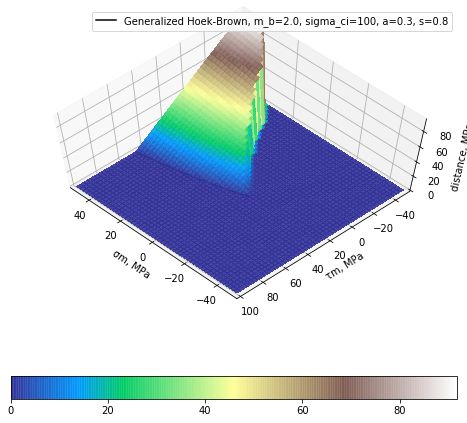

In [31]:
draw = {
    'surface': draw_surface,
    'image': draw_image,
    'line': draw_line
}

def plots(min_x=-150, max_x=150, min_y=0, max_y=150, nx=301, ny=151,
               c0=100, t0=10, c=1., phi=1.,
               sigma_ci=100, m_b=1., a=.3, s=.8,
               width=8, height=8, elev=65, azim=135,
               tol=1e-2, maxit=100,
               color='black', cmap='tab10',
               fc='all', pt='line', t='criterion'):
  kwargs = locals()
  xs = np.linspace(min_x, max_x, nx)    
  ys = np.linspace(min_y, max_y, ny)
  xx, yy = np.meshgrid(xs, ys)
  fig = plt.figure(figsize=(width, height))
  if pt in ['surface']:
    ax = fig.add_subplot(1, 1, 1, projection='3d')
  else:
    ax = fig.add_subplot(1, 1, 1)
  draw[pt](fig, ax, xx, yy, **kwargs)
  plt.show()
  
interact_manual(plots, 
         min_x=(-2000, 2000, 1), 
         max_x=(-2000, 2000, 1),
         nx=(0, 2000, 1),
         min_y=(-2000, 2000, 1), 
         max_y=(-2000, 2000, 1),
         ny=(0, 2000, 1),
         c0=(0., 2000., 1.),
         t0=(0., 2000., 1.),
         width=(0, 20, 1), 
         height=(0, 60, 1),
         elev=(-180, 180, 1),
         azim=(-180, 180, 1),
         tol=(0.00001, 1, 0.00001),
         maxit=(1, 10000, 1),
         cmap=cm.cmap_d.keys(),
         color=[*colors.BASE_COLORS, *colors.CSS4_COLORS],
         fc = ['mohr-coulomb', 'hoek-brown', 'generalized hoek-brown', 'all'],
         pt = ['surface', 'image', 'line'],
         t = ['distance', 'distance_0', 'criterion']
        );